# Final Project

## By: Ignacio Riboldi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("StationDetails.csv", sep=",", quotechar='"', on_bad_lines='skip', engine='python') # Using a skip on bad lines since there is one line (212) that is longer that the headers I have.

print(df.head())


   county  station name                    name  height(m)  easting  northing  \
0  Antrim          5880         LH_RATHLIN_WEST         10   309200    451800   
1  Carlow          4415     TULLOW (Waterworks)         76   284700    173400   
2  Carlow          2414             BORRIS G.S.         85   272400    150700   
3  Carlow          1214  CARLOW (SUGAR FACTORY)         58   272200    178400   
4  Carlow           115     HACKETSTOWN RECTORY        182   297600    180500   

   latitude  longitude open year close year  
0  55.30083   -6.28028      2000     (null)  
1  52.80528   -6.74306      1985     (null)  
2  52.60278   -6.93056      1944       1991  
3  52.85139   -6.92778      1953       1960  
4  52.86667   -6.55000      1910       1944  


In [2]:
headers = df.columns.tolist()
headers

['county',
 'station name',
 'name',
 'height(m)',
 'easting',
 'northing',
 'latitude',
 'longitude',
 'open year',
 'close year']

In [3]:
drop_col_list = ['station name', 'name']
df.drop(columns=drop_col_list, inplace=True)

# Convert 'open year' and 'close year' to numeric, forcing errors to NaN
df['open year'] = pd.to_numeric(df['open year'], errors='coerce')
df['close year'] = pd.to_numeric(df['close year'], errors='coerce')

# Fill NaN values with 9999 what would be considered as "Present" in a numeric way
df['open year'] = df['open year'].fillna(9999)
df['close year'] = df['close year'].fillna(9999)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   county      2081 non-null   object 
 1   height(m)   2081 non-null   int64  
 2   easting     2081 non-null   int64  
 3   northing    2081 non-null   int64  
 4   latitude    2081 non-null   float64
 5   longitude   2081 non-null   float64
 6   open year   2081 non-null   float64
 7   close year  2081 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 130.2+ KB


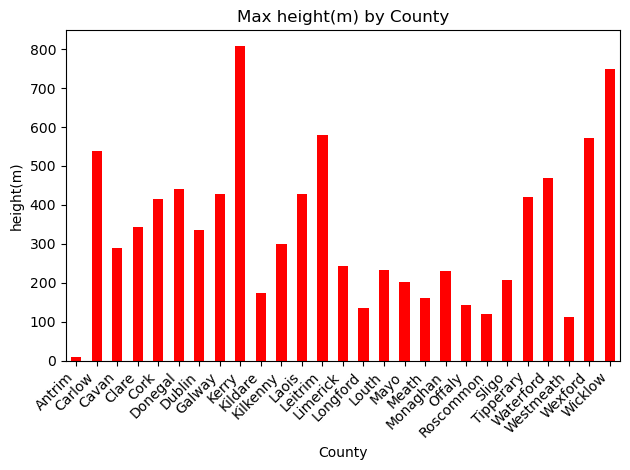

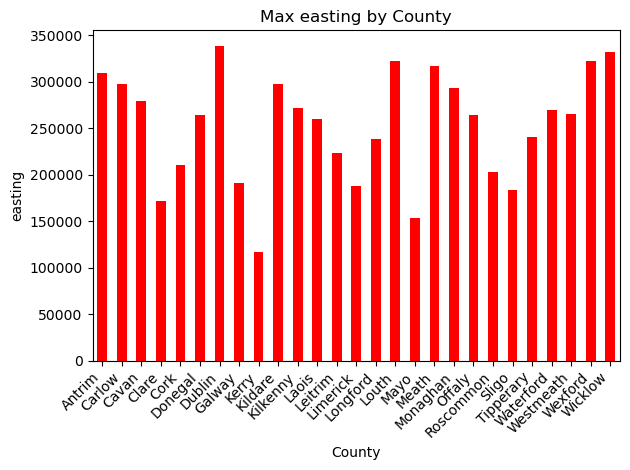

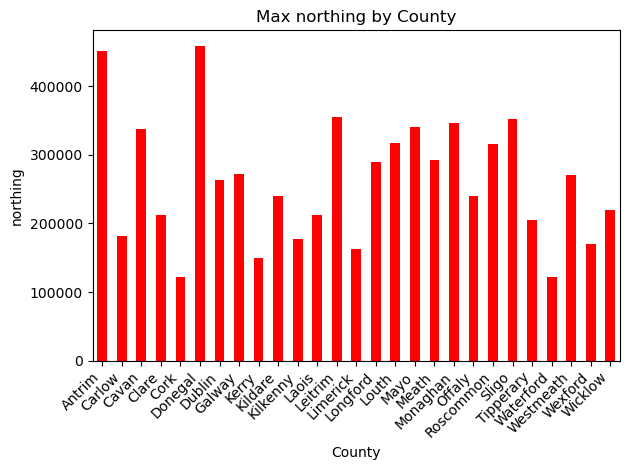

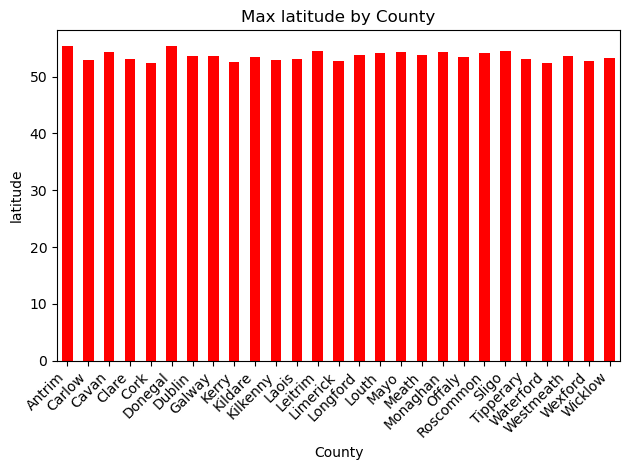

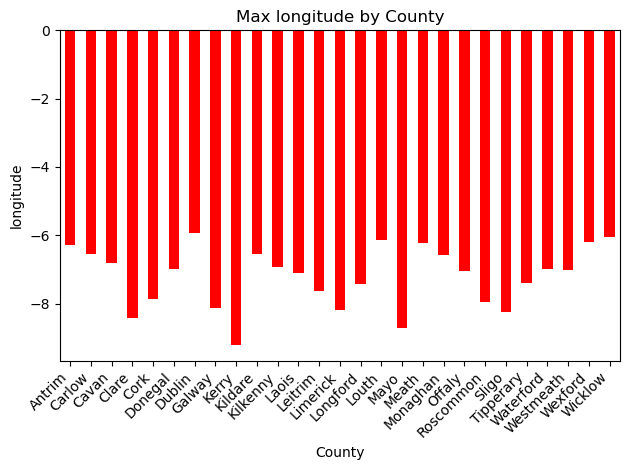

In [4]:
# Creating bar charts for max values of the following fields by county
columns_to_plot = [
    "height(m)",
    "easting",
    "northing",
    "latitude",
    "longitude"
]

# Group by county and take max
max_by_county = df.groupby("county")[columns_to_plot].max()

# Create bar charts (one per field)
for col in columns_to_plot:
    plt.figure()
    max_by_county[col].plot(kind="bar", color='red')
    plt.title(f"Max {col} by County")
    plt.xlabel("County")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

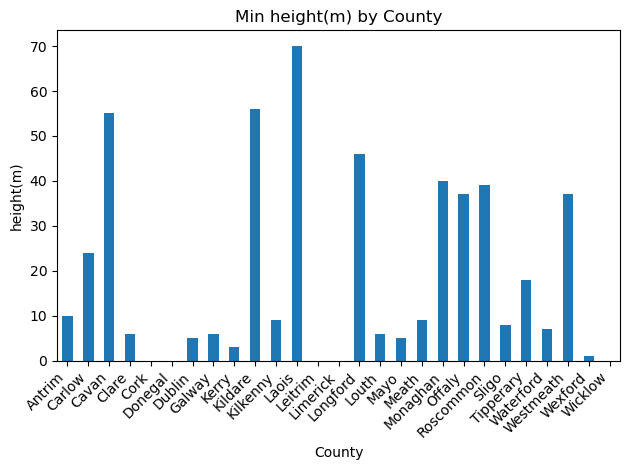

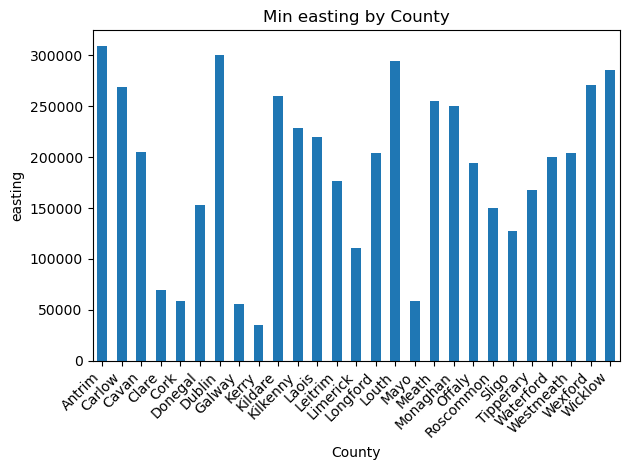

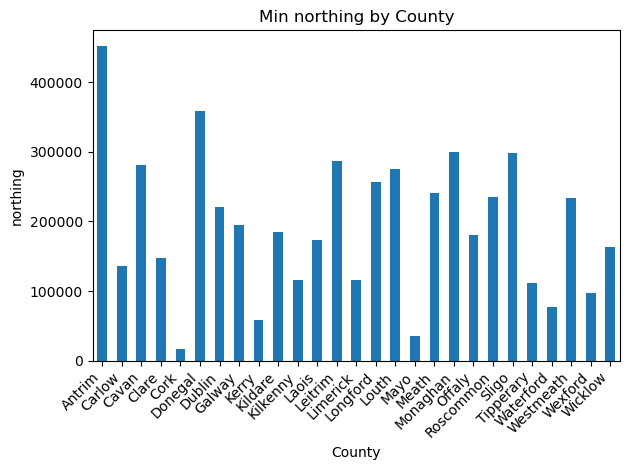

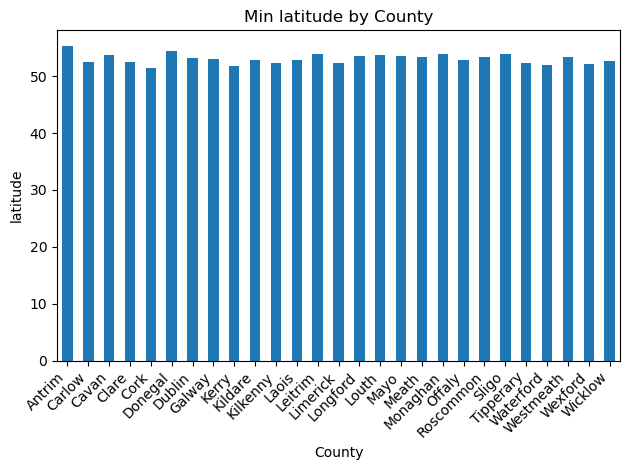

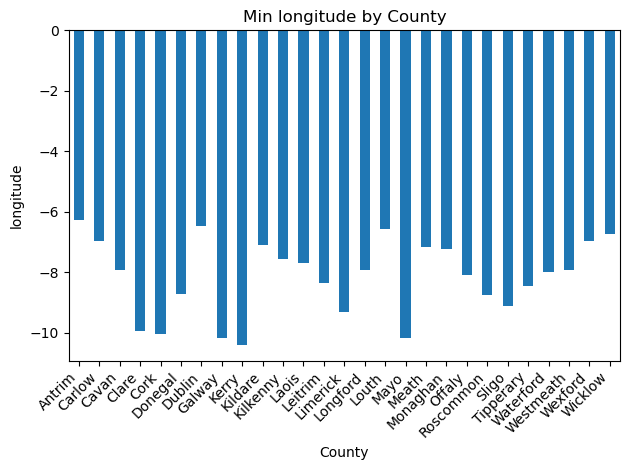

In [5]:
# Creating bar charts for min values of the following fields by county
columns_to_plot = [
    "height(m)",
    "easting",
    "northing",
    "latitude",
    "longitude"
]

# Group by county and take max
min_by_county = df.groupby("county")[columns_to_plot].min()

# Create bar charts (one per field)
for col in columns_to_plot:
    plt.figure()
    min_by_county[col].plot(kind="bar")
    plt.title(f"Min {col} by County")
    plt.xlabel("County")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

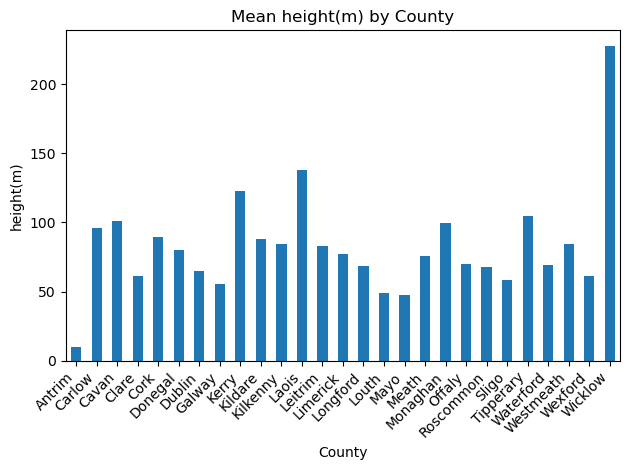

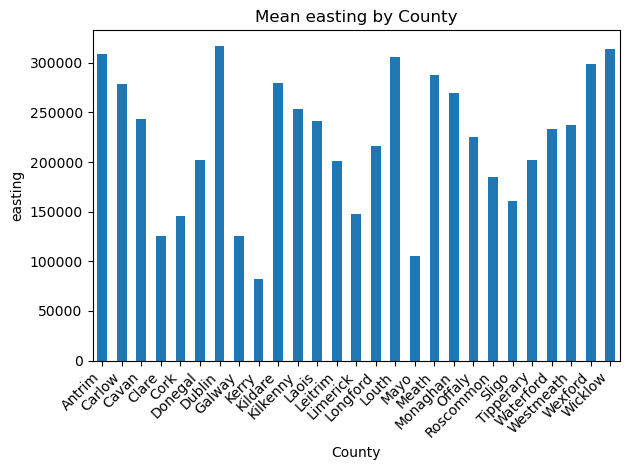

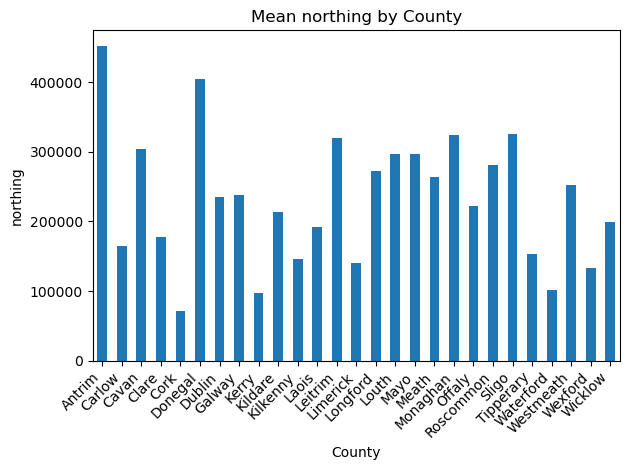

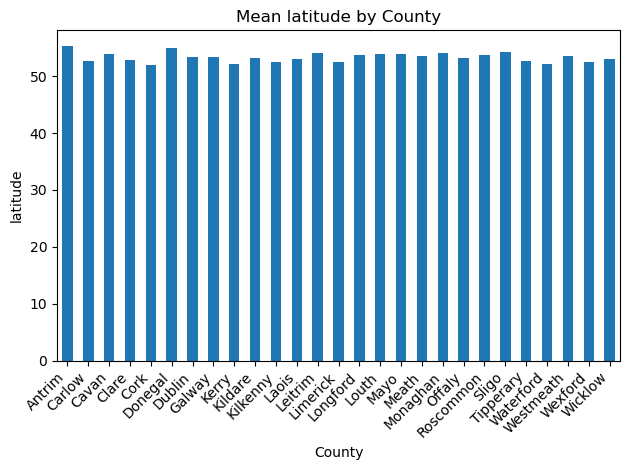

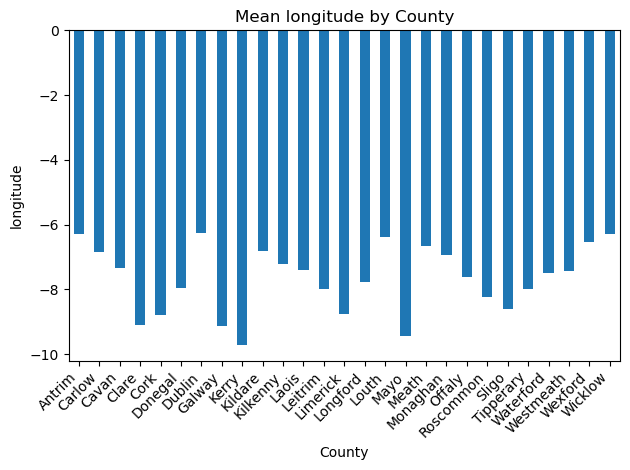

In [ ]:
# Calculating mean 
columns_to_plot = [
    "height(m)",
    "easting",
    "northing",
    "latitude",
    "longitude"
]

# Mean by county
mean_by_county = df.groupby("county")[columns_to_plot].mean()

# Plotting mean values
for col in columns_to_plot:
    plt.figure()
    mean_by_county[col].plot(kind="bar")
    plt.title(f"Mean {col} by County")
    plt.xlabel("County")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


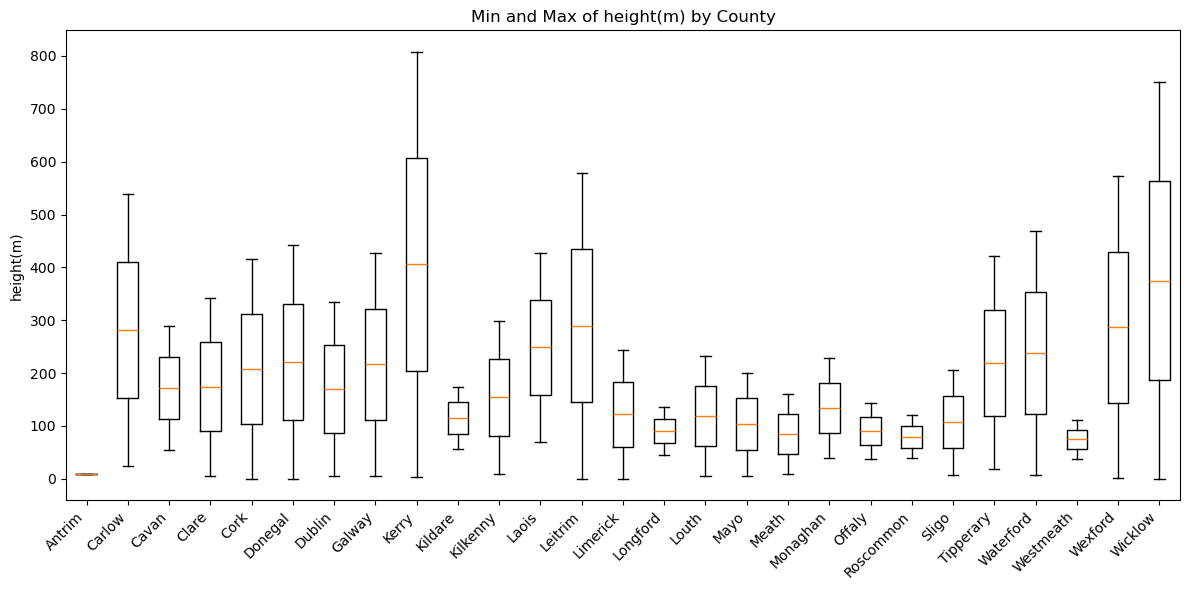

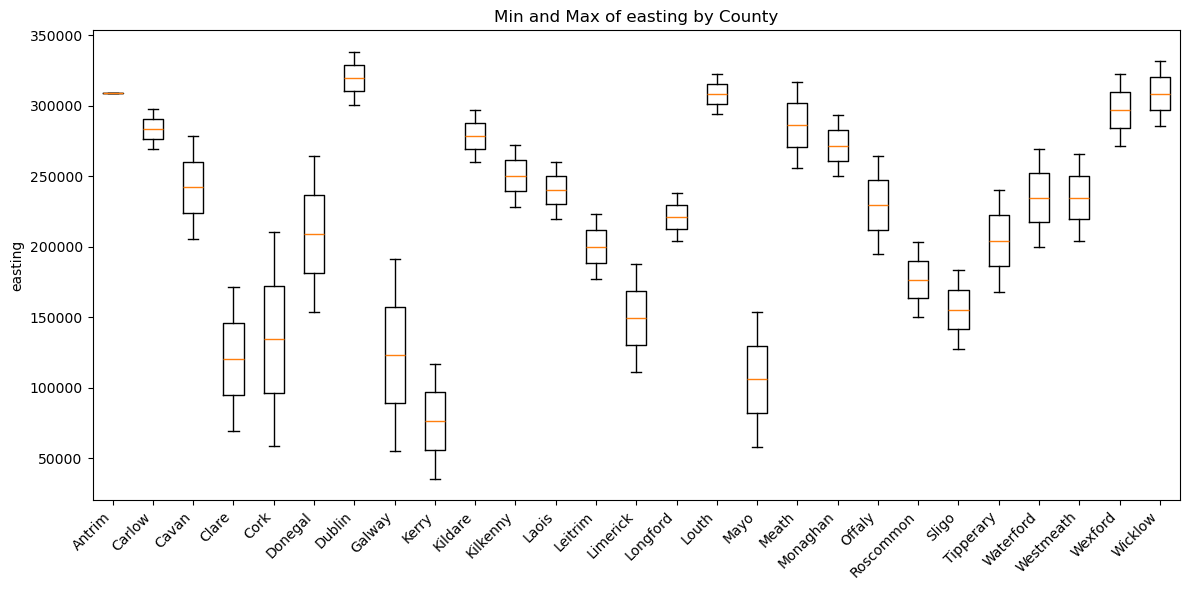

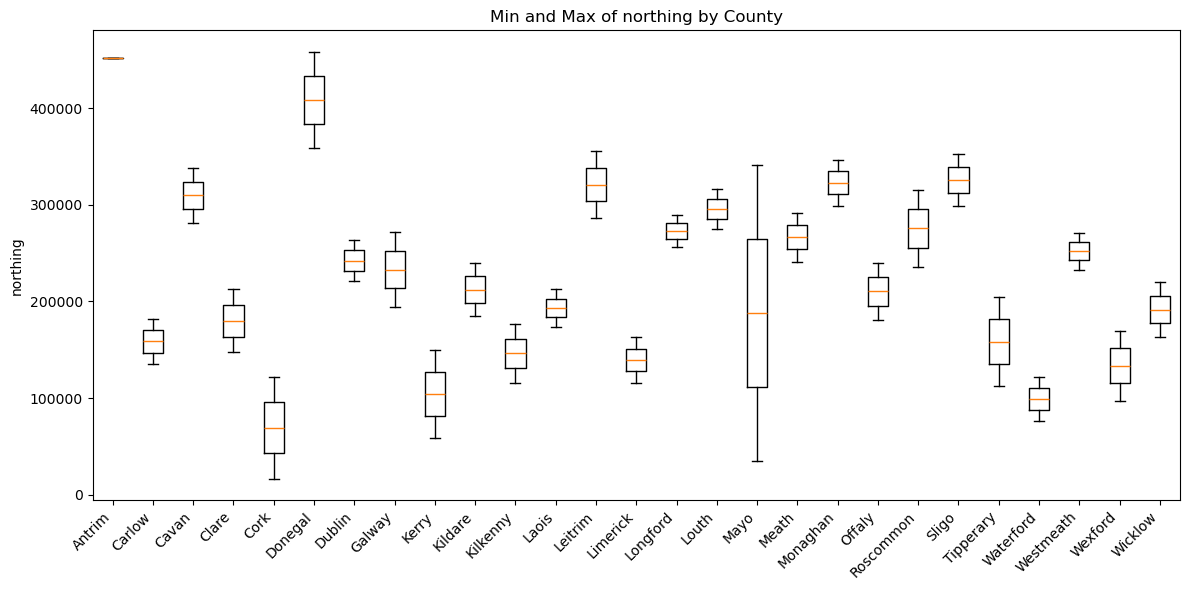

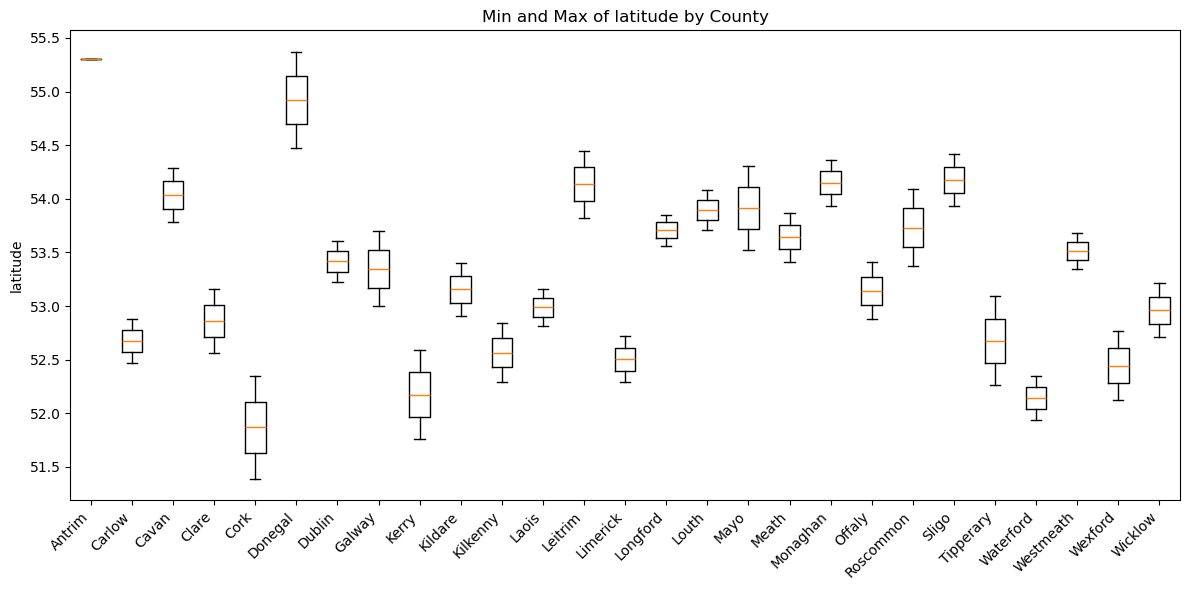

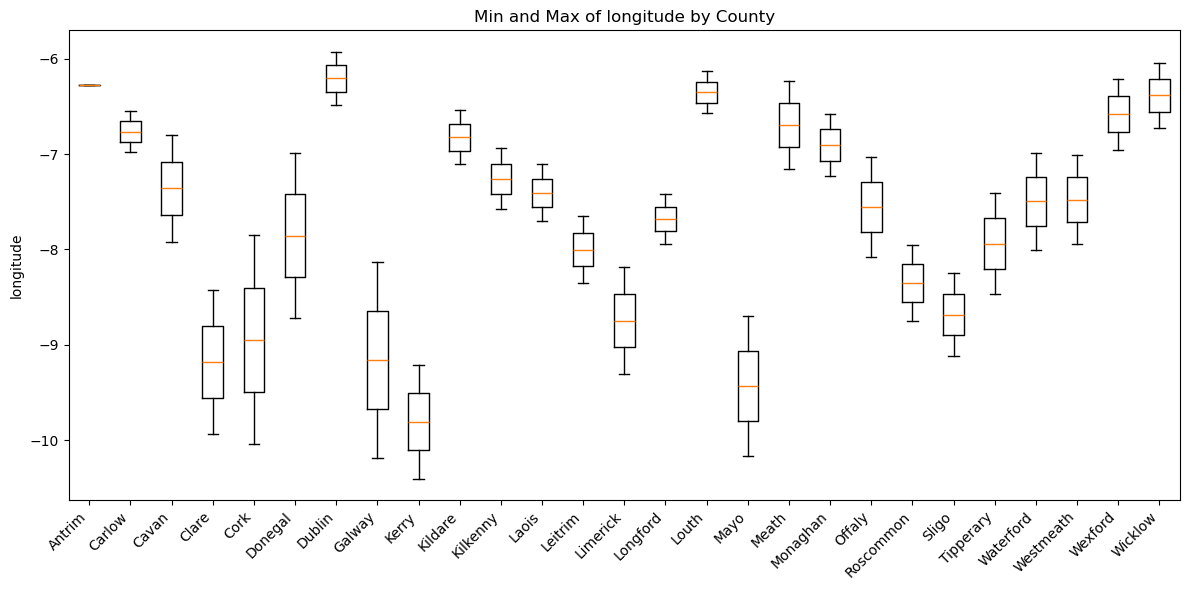

In [12]:
# Creating boxplots for min and max values of the following fields by county
columns_to_plot = [
    "height(m)",
    "easting",
    "northing",
    "latitude",
    "longitude"
]

# Grouping Max and Min
min_by_county = df.groupby("county")[columns_to_plot].min()
max_by_county = df.groupby("county")[columns_to_plot].max()

counties = min_by_county.index.tolist()

for col in columns_to_plot:
    plt.figure(figsize=(12,6))

    # Prepare data: each box = [min, max] for each county
    data = [[min_by_county.loc[county, col], max_by_county.loc[county, col]] 
            for county in counties]

    # Boxplot with county names on the X-axis
    plt.boxplot(data, tick_labels=counties)
    
    plt.title(f"Min and Max of {col} by County")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
